In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## 1) Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from helpers import *
from data_modification import replace_by_mean


""" Load TRAINING data """
DATA_TRAIN_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/train.csv'
y, raw_tx, ids = load_csv_data(DATA_TRAIN_PATH)
y = np.reshape(y, (len(y),1))
idx = y ==-1
y[y == -1] = 0


# Replace -999 by the mean of its respective column
processed_tx = replace_by_mean(raw_tx)

# Standardize (subtract mean and divive by standard deviation)
processed_tx, mean_x, std_x = standardize(processed_tx)


""" Load TEST data """
DATA_TEST_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/test.csv' # download test data and supply path here 
_, raw_tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

processed_tx_test = replace_by_mean(raw_tX_test)
processed_tx_test = standardize_(processed_tx_test, mean_x, std_x)

## Logistic Regression

In [5]:
from helpers import split_data
from proj1_helpers import predict_labels_LR
from logistic_regression import logistic_regression
from feature_transformation import build_poly_matrix

x_poly = build_poly_matrix(np.copy(processed_tx),7)

ratio = 0.9
x_train, y_train, x_test, y_test = split_data(x_poly, np.copy(y), ratio)

gamma = 0.0001
loss, w = logistic_regression(y_train, x_train, gamma, 500)
y_pred = predict_labels_LR(w, x_test)
y_pred[y_pred == -1] =0

same = y_pred == y_test
correct_rate = np.sum(same)/ len(y_test)
correct_rate

Current iteration=0, the loss=0.6931471805599453
Current iteration=50, the loss=6930773673647726.0
Current iteration=100, the loss=202634675564915.2
Current iteration=150, the loss=83407062895006.77
Current iteration=200, the loss=349243069360980.3
Current iteration=250, the loss=620628892208067.9
Current iteration=300, the loss=173069928357050.34


KeyboardInterrupt: 

In [157]:
gamma = 0.0001
loss, weights = logistic_regression(y, np.copy(processed_tx), gamma, 1000)

Current iteration=0, the loss=0.6931471805599453
3831.68565295
Current iteration=50, the loss=0.5029563122762439
246.974775425
Current iteration=100, the loss=0.5066116909440065
348.670891611
Current iteration=150, the loss=0.5030900661873708
179.785630211
Current iteration=200, the loss=0.5030207759388139
238.765112893
Current iteration=250, the loss=0.500780625428002
265.807270059
Current iteration=300, the loss=0.5021540187827936
173.710998726
Current iteration=350, the loss=0.4972551034303976
235.10864444
Current iteration=400, the loss=0.4932314383251207
293.858734895
Current iteration=450, the loss=0.5019149458899708
270.912380219
Current iteration=500, the loss=0.5090183193064483
225.617038513
Current iteration=550, the loss=0.49495204101381834
196.785348684
Current iteration=600, the loss=0.4980181789168184
281.648715068
Current iteration=650, the loss=0.507798072836081
176.054800943
Current iteration=700, the loss=0.49780441379898654
212.031590373
Current iteration=750, the lo

### prepare for submission

In [159]:
tx_test = np.copy(processed_tx_test)
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels_LR(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Regular Reg_logistic regression

Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-269927.18122539]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-274023.2293692]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-286563.25923926]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-239357.94457749]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-220577.43802734]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-121746.93673172]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-76309.27902676]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-34809.37269811]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-14657.82273021]
Current iteration=0, the loss=[ 693.14718056]
Current iteration=100, the loss=[-7039.12475989]
Current iteration=0, the loss=[ 693.

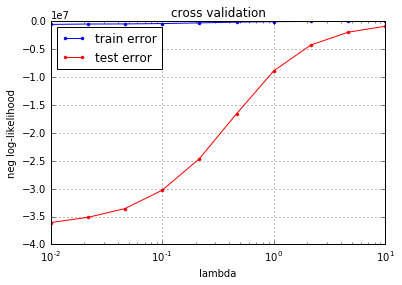

In [68]:
from cross_validation_RLR import run_reg_logistic_regression

tx = np.copy(processed_tx)
gamma = 0.1
max_iters = 200
run_reg_logistic_regression(y, tx, 0.01, max_iters)

## 4) Generate predictions and save ouput in csv format for submission:

In [89]:
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)